<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [2]:
# Import the Required Packages

# import keras, a high-level & easy to use neural network library built on top of tensorflow
from tensorflow import keras

# Used for building the various layers of the CNN model
from tensorflow.keras import layers
# Used for creating a sequential model to arrange the layers in a sequential order
from tensorflow.keras import models
# Used for compiling keras model by configuring weights and learning rate in order to reduce losses and get results faster
from tensorflow.keras import optimizers
# Used for image rescaling and augmentation techniques
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Used for performing regularization
from tensorflow.keras.regularizers import l2
# import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

# Used for initializing early stopping callback 
from keras import callbacks

# Make operating system dependent functionality available
import os

# Make model train faster
import tensorflow as tf
tf.config.optimizer.set_jit(True)

# Import Dense Function
from keras.layers import Activation, Dense

from keras.models import Model

from tensorflow.keras.optimizers import Adam

# Used for data visualizations and graphical plotting
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Data Loading

In [8]:
# Store base directory of train, validation, and test folders
main_directory = "C:\\Users\\shiny\\Desktop\\Deep Learning\\Deep Learning ASG- 10th June"
print("Main Directory: ",main_directory)

train_directory = os.path.join(main_directory, 'train')
validation_directory = os.path.join(main_directory, 'validation')
test_directory = os.path.join(main_directory, 'test')

Main Directory:  C:\Users\shiny\Desktop\Deep Learning\Deep Learning ASG- 10th June


## Step 2:  Develop the Image Classification Models

### Model #1A - Model Trained From Scratch without Data Augmentation

In [3]:
# Build the Model

image_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'valid', input_shape=(image_size, image_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'valid', kernel_regularizer=l2(0.00005)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'valid', kernel_regularizer=l2(0.00005)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding = 'valid', kernel_regularizer=l2(0.00005)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 74, 74, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [5]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [6]:
# Train the Model
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Reference used for deciding class_mode:
# https://stackoverflow.com/questions/59439128/what-does-class-mode-parameter-in-keras-image-gen-flow-from-directory-signify
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_directory,
        # All images will be resized to 150x150
        target_size=(image_size, image_size),
        batch_size=20,
        # Since we use sparse_categorical_crossentropy loss, we need sparse labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_directory,
        target_size=(image_size, image_size),
        batch_size=20,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [7]:
earlystopping = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience = 20)

# steps_per_epoch * batch_size = number_of_rows_in_train_data
# validation step * batch_size = number_of_rows_in_validataion_data
history = model.fit(
      train_generator,
      steps_per_epoch=400,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50, callbacks = [earlystopping])

Epoch 1/100
400/400 [==============================] - 37s 71ms/step - loss: 10.7963 - accuracy: 0.2126 - val_loss: 5.0648 - val_accuracy: 0.1710
Epoch 2/100
400/400 [==============================] - 27s 68ms/step - loss: 2.5404 - accuracy: 0.2726 - val_loss: 2.2837 - val_accuracy: 0.2990
Epoch 3/100
400/400 [==============================] - 28s 69ms/step - loss: 2.0110 - accuracy: 0.3224 - val_loss: 2.6970 - val_accuracy: 0.2670
Epoch 4/100
400/400 [==============================] - 30s 74ms/step - loss: 1.8987 - accuracy: 0.3448 - val_loss: 1.8012 - val_accuracy: 0.3760
Epoch 5/100
400/400 [==============================] - 29s 73ms/step - loss: 1.8905 - accuracy: 0.3604 - val_loss: 2.0008 - val_accuracy: 0.3410
Epoch 6/100
400/400 [==============================] - 29s 73ms/step - loss: 1.8352 - accuracy: 0.3715 - val_loss: 1.9220 - val_accuracy: 0.3790
Epoch 7/100
400/400 [==============================] - 29s 72ms/step - loss: 1.8240 - accuracy: 0.3898 - val_loss: 2.0237 - val_a

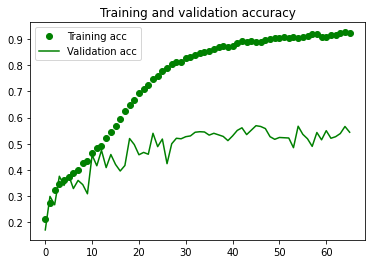

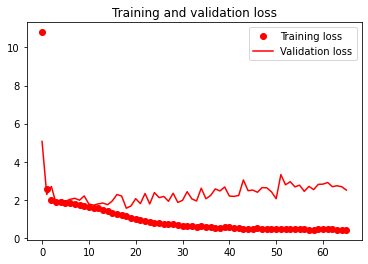

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
# Save the Model
model.save('food_model_1a.h5')

### Model #1B - Optimized Model Trained From Scratch with Data Augmentation

In [10]:
# Build the Model

image_size = 150
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'valid', input_shape=(image_size, image_size, 3)))
model.add(BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'valid', input_shape=(image_size, image_size, 3)))
model.add(BatchNormalization(axis = 3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'valid', input_shape=(image_size, image_size, 3)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'valid', input_shape=(image_size, image_size, 3)))
model.add(BatchNormalization(axis = 3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'valid', input_shape=(image_size, image_size, 3)))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'valid', input_shape=(image_size, image_size, 3)))
model.add(BatchNormalization(axis = 3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)       

In [12]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2*1e-4), 
              loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
# Train the Model

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    fill_mode = 'nearest',
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8,1.2])

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_directory,
        # All images will be resized to 150x150
        target_size=(image_size, image_size),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_directory,
        target_size=(image_size, image_size),
        batch_size=10,
        class_mode='categorical')

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [15]:
earlystopping = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience = 20)
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=100, callbacks = [earlystopping])

Epoch 1/100
800/800 [==============================] - 96s 108ms/step - loss: 2.3088 - accuracy: 0.2356 - val_loss: 2.6861 - val_accuracy: 0.2560
Epoch 2/100
800/800 [==============================] - 94s 118ms/step - loss: 2.1719 - accuracy: 0.2641 - val_loss: 2.3682 - val_accuracy: 0.2740
Epoch 3/100
800/800 [==============================] - 99s 124ms/step - loss: 2.1004 - accuracy: 0.2875 - val_loss: 1.9661 - val_accuracy: 0.3430
Epoch 4/100
800/800 [==============================] - 93s 116ms/step - loss: 2.0000 - accuracy: 0.3173 - val_loss: 1.9411 - val_accuracy: 0.3610
Epoch 5/100
800/800 [==============================] - 87s 108ms/step - loss: 1.8775 - accuracy: 0.3520 - val_loss: 2.0755 - val_accuracy: 0.3660
Epoch 6/100
800/800 [==============================] - 94s 117ms/step - loss: 1.8153 - accuracy: 0.3785 - val_loss: 2.4137 - val_accuracy: 0.3520
Epoch 7/100
800/800 [==============================] - 88s 110ms/step - loss: 1.7621 - accuracy: 0.3955 - val_loss: 2.2475 -

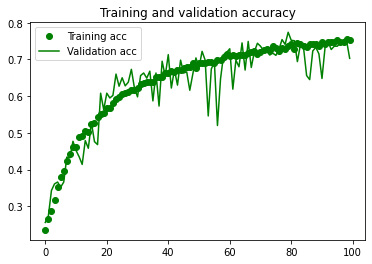

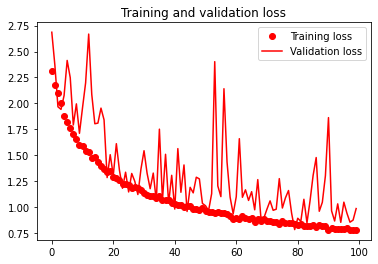

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Save the Model
model.save('food_model_1b.h5')

### Model #2A - Data Augmented VGG19 Model without Fine-Tuning

In [18]:
from tensorflow.keras.applications import VGG19
img_size = 150

conv_base = VGG19(weights='imagenet', include_top=False, 
                  input_shape=(img_size, img_size, 3))

In [19]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [20]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 24,224,330
Trainable params: 24,224,330
Non-trainable params: 0
_________________________________________________________________


In [22]:
conv_base.trainable = False

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 24,224,330
Trainable params: 4,199,946
Non-trainable params: 20,024,384
_________________________________________________________________


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    fill_mode = 'nearest',
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8,1.2])

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_directory,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_directory,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

earlystopping = callbacks.EarlyStopping(monitor='val_acc', mode='max', patience = 10)
history = model.fit(
      train_generator,
      steps_per_epoch=400,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1, callbacks = [earlystopping])

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/60
400/400 [==============================] - 112s 261ms/step - loss: 1.9322 - acc: 0.3325 - val_loss: 1.6095 - val_acc: 0.4450
Epoch 2/60
400/400 [==============================] - 103s 256ms/step - loss: 1.5946 - acc: 0.4560 - val_loss: 1.4162 - val_acc: 0.5130
Epoch 3/60
400/400 [==============================] - 109s 272ms/step - loss: 1.4702 - acc: 0.5010 - val_loss: 1.3295 - val_acc: 0.5340
Epoch 4/60
400/400 [==============================] - 119s 297ms/step - loss: 1.4001 - acc: 0.5238 - val_loss: 1.2526 - val_acc: 0.5610
Epoch 5/60
400/400 [==============================] - 115s 286ms/step - loss: 1.3615 - acc: 0.5385 - val_loss: 1.2026 - val_acc: 0.5740
Epoch 6/60
400/400 [==============================] - 109s 271ms/step - loss: 1.3312 - acc: 0.5395 - val_loss: 1.1825 - val_acc: 0.5760
Epoch 7/60
400/400 [==============================] - 108s 271ms/step - loss: 1.3007 - acc: 0.5570

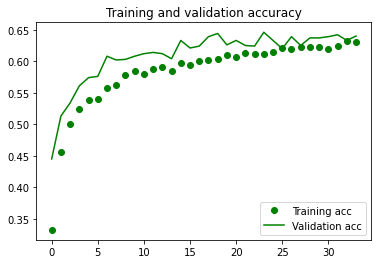

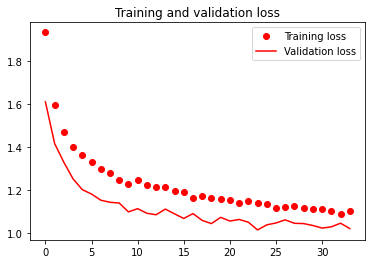

In [25]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
model.save('food_model_2a.h5')

### Model #2B - Data Augmented VGG19 Model with Fine-Tuning

In [27]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [28]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
             
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 24,224,330
Trainable params: 13,639,178
Non-trainable params: 10,585,152
_________________________________________________________________


In [29]:
earlystopping = callbacks.EarlyStopping(monitor='val_acc', mode='max', patience = 10)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=400,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=50, callbacks = [earlystopping])

Epoch 1/60
400/400 [==============================] - 99s 238ms/step - loss: 1.6136 - acc: 0.4784 - val_loss: 1.1788 - val_acc: 0.5990
Epoch 2/60
400/400 [==============================] - 104s 260ms/step - loss: 1.2112 - acc: 0.5996 - val_loss: 1.1164 - val_acc: 0.6360
Epoch 3/60
400/400 [==============================] - 107s 267ms/step - loss: 1.1126 - acc: 0.6375 - val_loss: 1.0256 - val_acc: 0.7160
Epoch 4/60
400/400 [==============================] - 109s 272ms/step - loss: 1.0455 - acc: 0.6653 - val_loss: 0.9976 - val_acc: 0.6880
Epoch 5/60
400/400 [==============================] - 111s 277ms/step - loss: 1.0116 - acc: 0.6775 - val_loss: 0.9647 - val_acc: 0.6940
Epoch 6/60
400/400 [==============================] - 113s 282ms/step - loss: 0.9859 - acc: 0.6844 - val_loss: 1.0473 - val_acc: 0.6950
Epoch 7/60
400/400 [==============================] - 117s 292ms/step - loss: 0.9829 - acc: 0.6911 - val_loss: 0.9495 - val_acc: 0.7350
Epoch 8/60
400/400 [=============================

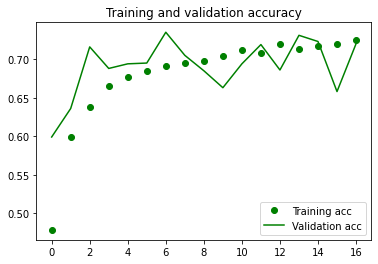

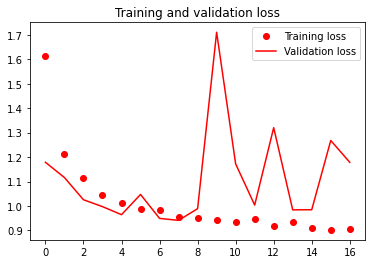

In [30]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
model.save('food_model_2b.h5')

### Model #3A - Data Augmented InceptionResNetV2 Model without Fine-Tuning

In [40]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
img_size = 150

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, 
                  input_shape=(img_size, img_size, 3))

In [41]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_213 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_214 (BatchN (None, 74, 74, 32)   96          conv2d_213[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 74, 74, 32)   0           batch_normalization_214[0][0]    
________________________________________________________________________________

In [42]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax', kernel_initializer='random_uniform'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_4 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               1382500   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 55,720,246
Trainable params: 55,659,702
Non-trainable params: 60,544
_________________________________________________________________


In [44]:
conv_base.trainable = False

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_4 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               1382500   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 55,720,246
Trainable params: 1,383,510
Non-trainable params: 54,336,736
_________________________________________________________________


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    fill_mode = 'nearest',
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8,1.2])

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_directory,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_directory,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

earlystopping = callbacks.EarlyStopping(monitor='val_acc', mode='max', patience = 15)
history = model.fit(
      train_generator,
      steps_per_epoch=400,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1, callbacks = [earlystopping])

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/60
400/400 [==============================] - 115s 232ms/step - loss: 1.5592 - acc: 0.4859 - val_loss: 1.1004 - val_acc: 0.6440
Epoch 2/60
400/400 [==============================] - 88s 219ms/step - loss: 1.1760 - acc: 0.6061 - val_loss: 0.9711 - val_acc: 0.6870
Epoch 3/60
400/400 [==============================] - 88s 220ms/step - loss: 1.0791 - acc: 0.6343 - val_loss: 0.9071 - val_acc: 0.7070
Epoch 4/60
400/400 [==============================] - 88s 219ms/step - loss: 1.0326 - acc: 0.6498 - val_loss: 0.8595 - val_acc: 0.7090
Epoch 5/60
400/400 [==============================] - 90s 225ms/step - loss: 0.9890 - acc: 0.6659 - val_loss: 0.8469 - val_acc: 0.7060
Epoch 6/60
400/400 [==============================] - 87s 217ms/step - loss: 0.9752 - acc: 0.6735 - val_loss: 0.8174 - val_acc: 0.7240
Epoch 7/60
400/400 [==============================] - 84s 210ms/step - loss: 0.9451 - acc: 0.6795 - val

400/400 [==============================] - 88s 219ms/step - loss: 0.6876 - acc: 0.7635 - val_loss: 0.6560 - val_acc: 0.7930


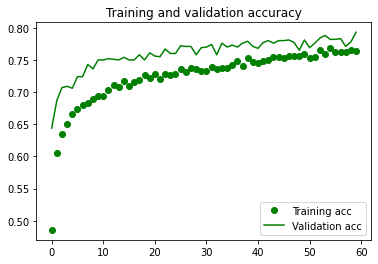

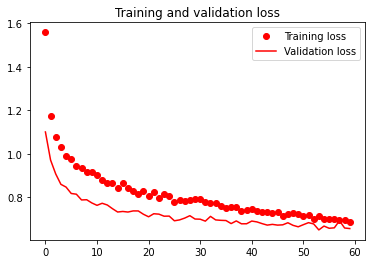

In [47]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
model.save('food_model_3a.h5')

### Model #3B - Data Augmented InceptionResNetV2 Model with Fine-Tuning

In [49]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_213 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_214 (BatchN (None, 74, 74, 32)   96          conv2d_213[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 74, 74, 32)   0           batch_normalization_214[0][0]    
________________________________________________________________________________

In [50]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block8_9_conv':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
             
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_4 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               1382500   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 55,720,246
Trainable params: 7,548,406
Non-trainable params: 48,171,840
_________________________________________________________________


In [51]:
earlystopping = callbacks.EarlyStopping(monitor='val_acc', mode='max', patience = 15)
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=400,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=50, callbacks = [earlystopping])

Epoch 1/60
400/400 [==============================] - 117s 232ms/step - loss: 1.2818 - acc: 0.5795 - val_loss: 2.2025 - val_acc: 0.5000
Epoch 2/60
400/400 [==============================] - 88s 219ms/step - loss: 1.0523 - acc: 0.6525 - val_loss: 1.1828 - val_acc: 0.6810
Epoch 3/60
400/400 [==============================] - 98s 244ms/step - loss: 0.9843 - acc: 0.6735 - val_loss: 0.9475 - val_acc: 0.7060
Epoch 4/60
400/400 [==============================] - 94s 236ms/step - loss: 0.9328 - acc: 0.6911 - val_loss: 1.0728 - val_acc: 0.6750
Epoch 5/60
400/400 [==============================] - 95s 238ms/step - loss: 0.8892 - acc: 0.7090 - val_loss: 0.8591 - val_acc: 0.7410
Epoch 6/60
400/400 [==============================] - 95s 238ms/step - loss: 0.8542 - acc: 0.7198 - val_loss: 0.8426 - val_acc: 0.7120
Epoch 7/60
400/400 [==============================] - 96s 239ms/step - loss: 0.8257 - acc: 0.7210 - val_loss: 0.7902 - val_acc: 0.7360
Epoch 8/60
400/400 [==============================] - 

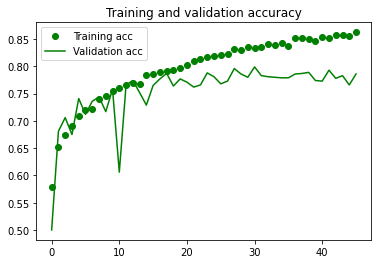

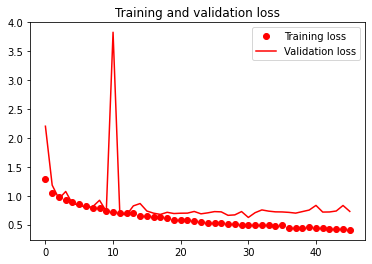

In [52]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
model.save('food_model_3b.h5')

### Model #4A - Fine-Tuned MobileNet Model without Data Augmentation

In [54]:
mobile = keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [55]:
mobile_extract = mobile.layers[-6].output
predictions = Dense(10, activation='softmax')(mobile_extract)

In [56]:
model = Model(inputs=mobile.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [57]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [58]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_directory,
        # All images will be resized to 150x150
        target_size=(image_size, image_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need sparse labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_directory,
        target_size=(image_size, image_size),
        batch_size=20,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [59]:
model.compile(Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [60]:
earlystopping = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience = 15)
# steps_per_epoch * batch_size = number_of_rows_in_train_data
# validation step * batch_size = number_of_rows_in_validataion_data
history = model.fit(train_generator, steps_per_epoch = 400, validation_data=validation_generator,
                   validation_steps=50, epochs=60, callbacks = [earlystopping])

Epoch 1/60
400/400 [==============================] - 37s 60ms/step - loss: 1.0896 - accuracy: 0.6436 - val_loss: 0.7771 - val_accuracy: 0.7490
Epoch 2/60
400/400 [==============================] - 23s 56ms/step - loss: 0.4408 - accuracy: 0.8571 - val_loss: 0.7021 - val_accuracy: 0.7770
Epoch 3/60
400/400 [==============================] - 23s 59ms/step - loss: 0.2348 - accuracy: 0.9338 - val_loss: 0.6592 - val_accuracy: 0.7950
Epoch 4/60
400/400 [==============================] - 24s 60ms/step - loss: 0.1388 - accuracy: 0.9683 - val_loss: 0.6745 - val_accuracy: 0.7950
Epoch 5/60
400/400 [==============================] - 24s 59ms/step - loss: 0.0915 - accuracy: 0.9810 - val_loss: 0.6470 - val_accuracy: 0.8040
Epoch 6/60
400/400 [==============================] - 24s 61ms/step - loss: 0.0619 - accuracy: 0.9909 - val_loss: 0.6509 - val_accuracy: 0.8060
Epoch 7/60
400/400 [==============================] - 24s 61ms/step - loss: 0.0454 - accuracy: 0.9945 - val_loss: 0.6920 - val_accuracy:

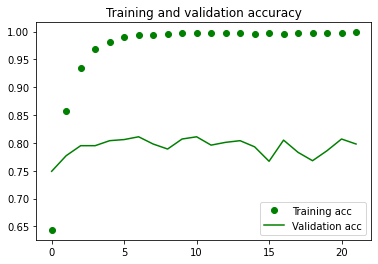

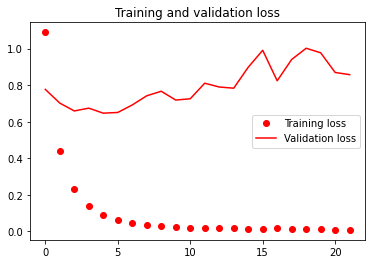

In [61]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [62]:
# Save the Model
model.save('food_model_4a.h5')

### Model #4B - Fine-Tuned MobileNet Model with Data Augmentation

In [3]:
mobile = keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [4]:
Regularizer = l2(0.001)
mobile_extract = mobile.layers[-6].output
predictions = Dense(10, activation='softmax', activity_regularizer=Regularizer, 
                    kernel_regularizer=Regularizer)(mobile_extract)

In [5]:
model = Model(inputs=mobile.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [6]:
for layer in model.layers[:-33]:
    layer.trainable = False

In [10]:
# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    fill_mode = 'nearest',
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8,1.2])
image_size = 150

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_directory,
        # All images will be resized to 150x150
        target_size=(image_size, image_size),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_directory,
        target_size=(image_size, image_size),
        batch_size=10,
        class_mode='categorical')

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [11]:
model.compile(Adam(learning_rate=0.002), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
earlystopping = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience = 20)
# steps_per_epoch * batch_size = number_of_rows_in_train_data
# validation step * batch_size = number_of_rows_in_validataion_data
history = model.fit(train_generator, steps_per_epoch = 800, validation_data=validation_generator,
                   validation_steps=100, epochs=60, callbacks = [earlystopping], shuffle = True)

Epoch 1/60
800/800 [==============================] - 97s 100ms/step - loss: 1.5215 - accuracy: 0.5480 - val_loss: 1.0290 - val_accuracy: 0.6870
Epoch 2/60
800/800 [==============================] - 73s 91ms/step - loss: 1.0536 - accuracy: 0.6653 - val_loss: 1.0002 - val_accuracy: 0.7060
Epoch 3/60
800/800 [==============================] - 98s 123ms/step - loss: 0.9406 - accuracy: 0.6976 - val_loss: 0.7909 - val_accuracy: 0.7440
Epoch 4/60
800/800 [==============================] - 89s 111ms/step - loss: 0.8592 - accuracy: 0.7175 - val_loss: 0.7810 - val_accuracy: 0.7640
Epoch 5/60
800/800 [==============================] - 89s 112ms/step - loss: 0.8040 - accuracy: 0.7443 - val_loss: 0.6841 - val_accuracy: 0.7900
Epoch 6/60
800/800 [==============================] - 90s 112ms/step - loss: 0.7559 - accuracy: 0.7610 - val_loss: 0.6394 - val_accuracy: 0.8130
Epoch 7/60
800/800 [==============================] - 89s 112ms/step - loss: 0.7382 - accuracy: 0.7636 - val_loss: 0.7389 - val_acc

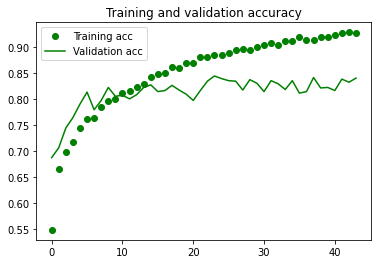

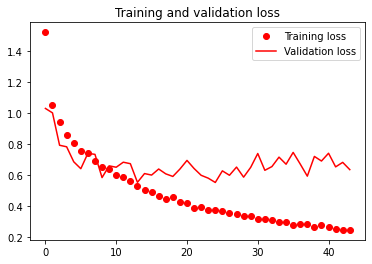

In [13]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
# Save the Model
model.save('food_model_4b.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [22]:
img_size = 150
test_generator = test_datagen.flow_from_directory(
        test_directory,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 10 classes.


In [15]:
# Model #1
model1b_trainedFromScratch = keras.models.load_model('food_model_1b.h5')

In [25]:
test_loss, test_acc = model1b_trainedFromScratch.evaluate(test_generator, steps = 50)
print('Test Accuracy of Model Trained From Scratch:', test_acc)
print('Test Loss of Model Trained From Scratch:', test_loss)

50/50 [==============================] - 2s 43ms/step - loss: 0.9534 - accuracy: 0.7290 1s -
Test Accuracy of Model Trained From Scratch: 0.7290000319480896
Test Loss of Model Trained From Scratch: 0.9534127712249756


In [16]:
# Model #2
model2b_vgg19 = keras.models.load_model('food_model_2b.h5')

In [26]:
test_loss, test_acc = model2b_vgg19.evaluate(test_generator, steps = 50)
print('Test Accuracy of VGG19 Model:', test_acc)
print('Test Loss of VGG19 Model:', test_loss)

50/50 [==============================] - 12s 134ms/step - loss: 1.0725 - acc: 0.7200
Test Accuracy of VGG19 Model: 0.7200000286102295
Test Loss of VGG19 Model: 1.0724748373031616


In [17]:
# Model #3
model3b_inceptionResNetV2 = keras.models.load_model('food_model_3b.h5')

In [27]:
test_loss, test_acc = model3b_inceptionResNetV2.evaluate(test_generator, steps = 50)
print('Test Accuracy of InceptionResNetV2 Model:', test_acc)
print('Test Loss of InceptionResNetV2 Model:', test_loss)

50/50 [==============================] - 19s 83ms/step - loss: 0.6547 - acc: 0.8000
Test Accuracy of InceptionResNetV2 Model: 0.800000011920929
Test Loss of InceptionResNetV2 Model: 0.6547302603721619


In [18]:
# Model #4
model4b_mobileNet = keras.models.load_model('food_model_4b.h5')

In [28]:
test_loss, test_acc = model4b_mobileNet.evaluate(test_generator, steps = 50)
print('Test Accuracy of MobileNet Model:', test_acc)
print('Test Loss of MobileNet Model:', test_loss)

50/50 [==============================] - 7s 45ms/step - loss: 0.5153 - accuracy: 0.8570
Test Accuracy of MobileNet Model: 0.8570000529289246
Test Loss of MobileNet Model: 0.515334963798523


In [29]:
# Save the best model
model4b_mobileNet.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [30]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [31]:
# Load the food list (in alphabetical order)
with open('60.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['apple_pie', 'club_sandwich', 'grilled_cheese_sandwich', 'guacamole', 'pancakes', 'pizza', 'prime_rib', 'risotto', 'seaweed_salad', 'spring_rolls']


In [36]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img_size = 224
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

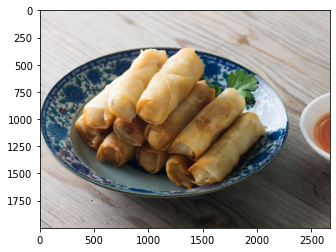

The prediction is:  spring_rolls 

    apple_pie  club_sandwich  grilled_cheese_sandwich  guacamole  pancakes  \
0    0.00508       0.000809                 0.006154    0.00198  0.012164   

      pizza  prime_rib   risotto  seaweed_salad  spring_rolls  
0  0.000769   0.001781  0.001178       0.001551      0.968535  


In [41]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'spring_rolls.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)